Датасет содержит изображения светофоров. Необходимо классифицировать изображения по цвету сигнала:

- изображения с зеленым сигналом,
- изображения с красным сигналом,
- изображения с желтым сигналом,
- изображения не поддающиеся классификации.
  
В результате работы программы должны быть четыре отдельных списка имен файлов.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_ROOT = "./data/tlights/"

# Распределение цветов для разных сигналов светофора

## Red

In [2]:
red_samples = [
    '100_01.jpg',
    '100_07.jpg',
    '100_25.jpg',
    '200_16.jpg',
]

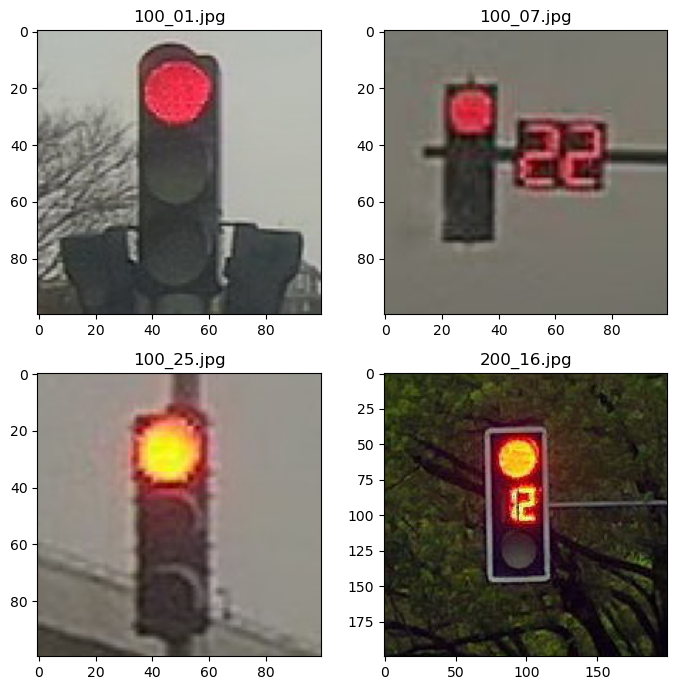

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax = ax.ravel()

for i, sample in enumerate(red_samples):
    img = cv2.imread(IMG_ROOT + sample)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].set_title(sample)
    
plt.tight_layout()

Выделим регионы интереса для каждого изображения

In [4]:
# x, y, r
roi_center_radius = [
    (47, 20, 10),
    (30, 27, 7),
    (47, 27, 10),
    (93, 61, 13)
]

Гистограммы для каждой картинки в HSV модели

Также посчитаем mean/std для каждого HSV канала

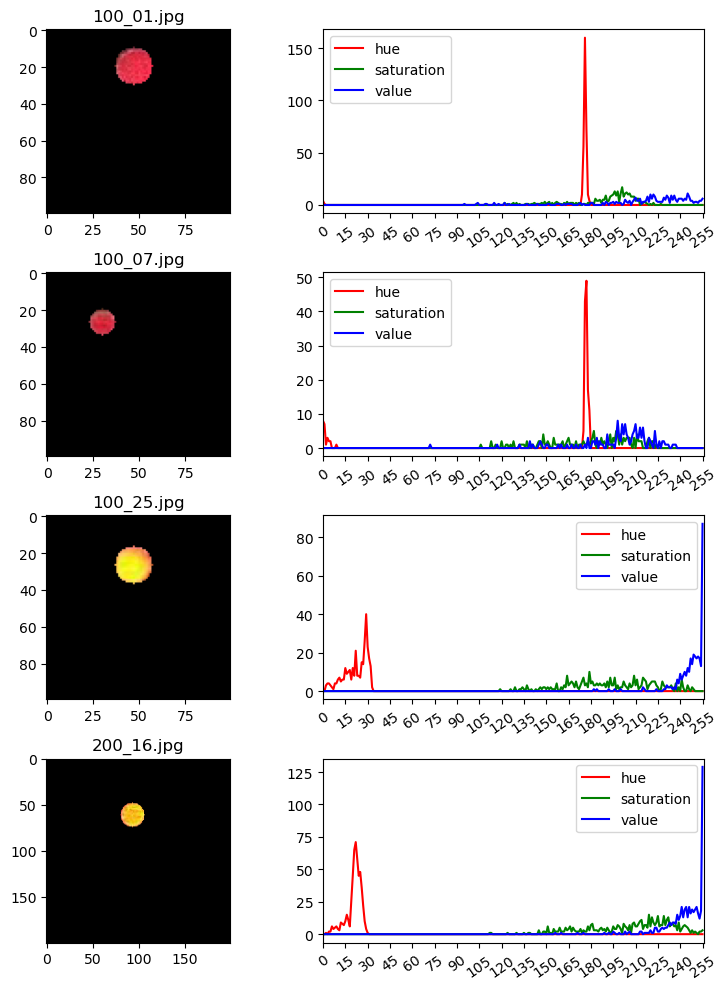

In [5]:
fig, ax = plt.subplots(4, 2, figsize=(8, 10))
ax = ax.ravel()

channels = ("hue", "saturation", "value")
colors = ("red", "green", "blue")
red_hsv_high = {"hue": [], "saturation": [], "value": []}
red_hsv_low = {"hue": [], "saturation": [], "value": []}
for i, sample in enumerate(red_samples):
    img = cv2.imread(IMG_ROOT + sample)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    x, y, r = roi_center_radius[i]
    cv2.circle(mask, (x, y), r, 1, -1)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    mask = mask.astype(bool)
    ax[2*i].imshow(masked_img)
    ax[2*i].set_title(sample)

    masked_img_hsv = cv2.cvtColor(masked_img, cv2.COLOR_RGB2HSV)
    for (channel_id, ch) in enumerate(channels):
        channel = cv2.split(masked_img_hsv)[channel_id]
        # разделим 0 и 1 картинку, и 2, 3. Т.к. они выглядят по-разному
        if i in [0, 1]:
            red_hsv_high[ch] += channel[mask].tolist()
        elif i in [2, 3]:
            red_hsv_low[ch] += channel[mask].tolist()
        histogram, bin_edges = np.histogram(
            channel[mask], bins=256, range=(0, 256)
        )
        ax[2*i + 1].set_xlim([0, 256])
        ax[2*i + 1].plot(histogram, color=colors[channel_id], label=ch)
        ax[2*i + 1].legend()
        ax[2*i + 1].set_xticks(np.arange(0, 256, 15), rotation=45)
        ax[2*i + 1].set_xticklabels(ax[2*i + 1].get_xticks(), rotation=35)

plt.tight_layout()

## Yellow

In [6]:
yellow_samples = [
    '100_02.jpg',
    '100_15.jpg',
    '100_24.jpg',
    '200_20.jpg',
]

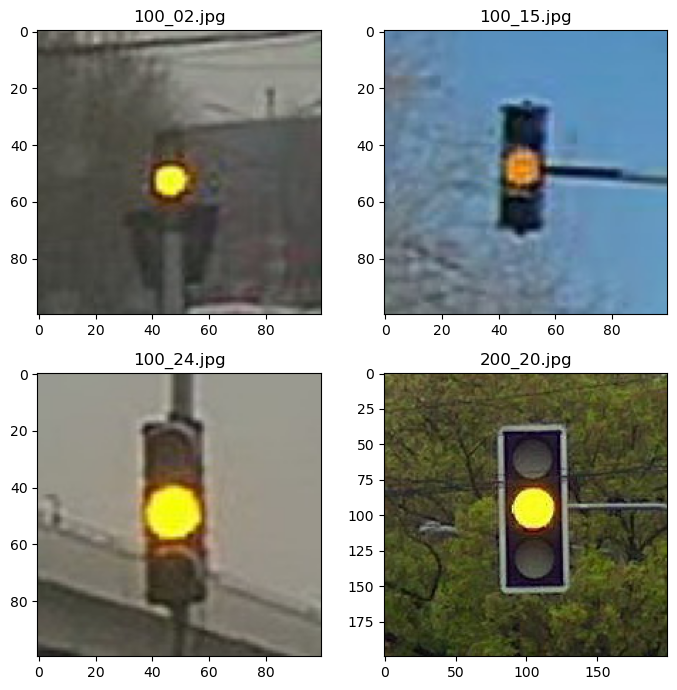

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax = ax.ravel()

for i, sample in enumerate(yellow_samples):
    img = cv2.imread(IMG_ROOT + sample)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].set_title(sample)
    
plt.tight_layout()

Выделим регионы интереса для каждого изображения

In [8]:
# x, y, r
roi_center_radius = [
    (47, 52, 6),
    (48, 48, 6),
    (47, 50, 9),
    (105, 98, 13)
]

Гистограммы для каждой картинки в HSV модели

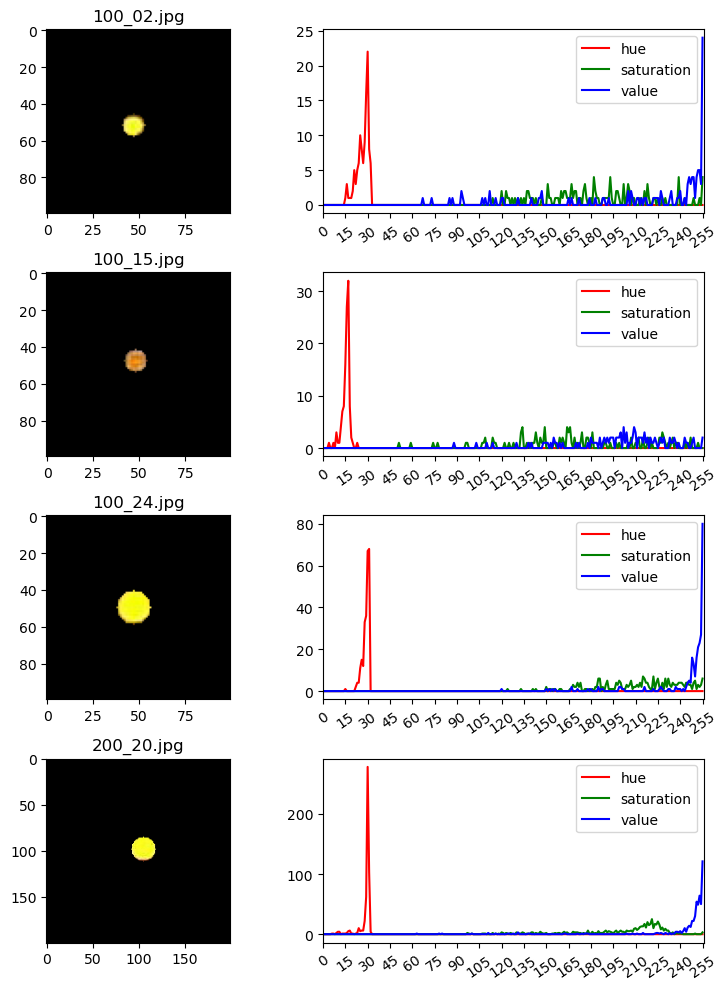

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(8, 10))
ax = ax.ravel()

names = ("hue", "saturation", "value")
colors = ("red", "green", "blue")
yellow_hsv = {"hue": [], "saturation": [], "value": []}
for i, sample in enumerate(yellow_samples):
    img = cv2.imread(IMG_ROOT + sample)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    x, y, r = roi_center_radius[i]
    cv2.circle(mask, (x, y), r, 1, -1)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    mask = mask.astype(bool)
    ax[2*i].imshow(masked_img)
    ax[2*i].set_title(sample)

    masked_img_hsv = cv2.cvtColor(masked_img, cv2.COLOR_RGB2HSV)
    for (channel_id, ch) in enumerate(channels):
        channel = cv2.split(masked_img_hsv)[channel_id]
        yellow_hsv[ch] += channel[mask].tolist()
        histogram, bin_edges = np.histogram(
            channel[mask], bins=256, range=(0, 256)
        )
        ax[2*i + 1].set_xlim([0, 256])
        ax[2*i + 1].plot(histogram, color=colors[channel_id], label=ch)
        ax[2*i + 1].legend()
        ax[2*i + 1].set_xticks(np.arange(0, 256, 15), rotation=45)
        ax[2*i + 1].set_xticklabels(ax[2*i + 1].get_xticks(), rotation=35)
    
plt.tight_layout()

# Green

In [10]:
green_samples = [
    '100_03.jpg',
    '100_05.jpg',
    '100_23.jpg',
    '200_10.jpg',
]

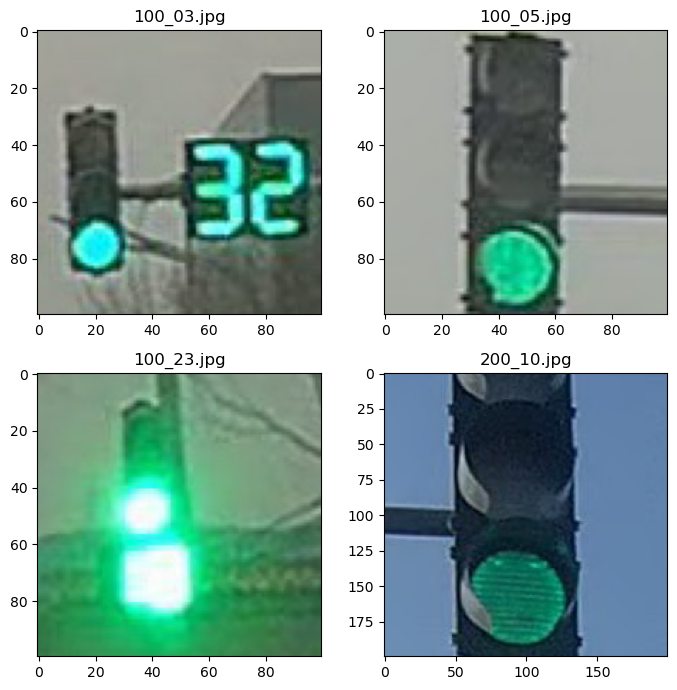

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax = ax.ravel()

for i, sample in enumerate(green_samples):
    img = cv2.imread(IMG_ROOT + sample)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].set_title(sample)
    
plt.tight_layout()

Выделим регионы интереса для каждого изображения

In [12]:
# x, y, r
roi_center_radius = [
    (20, 75, 8),
    (45, 83, 7),
    (42, 82, 10),
    (98, 160, 13)
]

Гистограммы для каждой картинки в HSV модели

Также посчитаем mean/std для каждого HSV канала

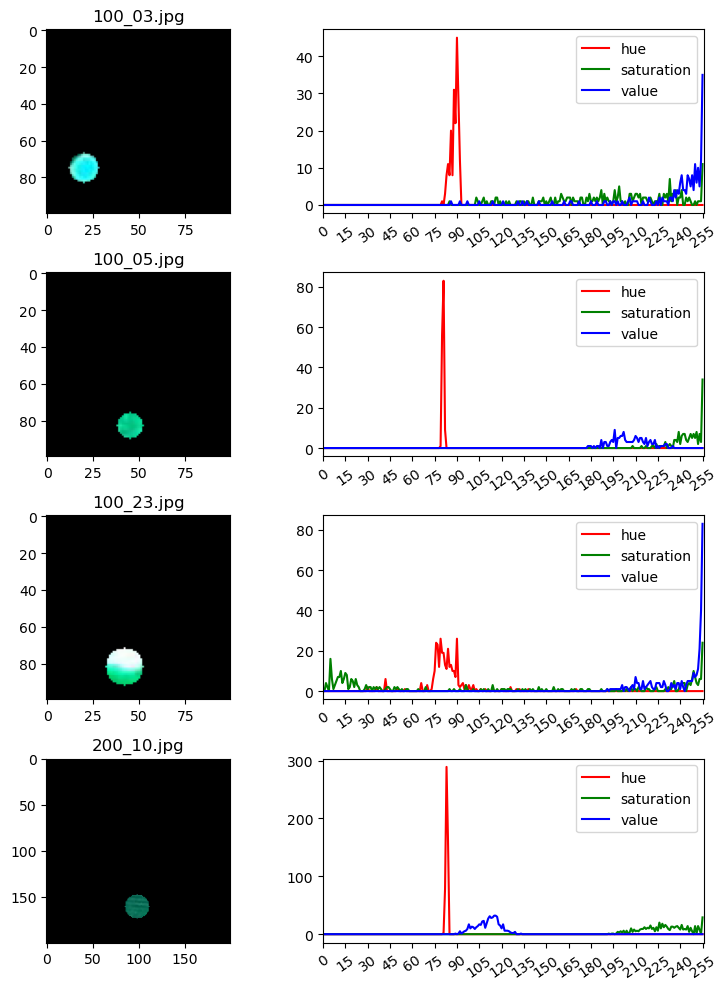

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(8, 10))
ax = ax.ravel()

channels = ("hue", "saturation", "value")
colors = ("red", "green", "blue")
green_hsv = {"hue": [], "saturation": [], "value": []}
for i, sample in enumerate(green_samples):
    img = cv2.imread(IMG_ROOT + sample)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    x, y, r = roi_center_radius[i]
    cv2.circle(mask, (x, y), r, 1, -1)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    mask = mask.astype(bool)
    ax[2*i].imshow(masked_img)
    ax[2*i].set_title(sample)

    masked_img_hsv = cv2.cvtColor(masked_img, cv2.COLOR_RGB2HSV)
    for (channel_id, ch) in enumerate(channels):
        channel = cv2.split(masked_img_hsv)[channel_id]
        green_hsv[ch] += channel[mask].tolist()
        histogram, bin_edges = np.histogram(
            channel[mask], bins=256, range=(0, 256)
        )
        ax[2*i + 1].set_xlim([0, 256])
        ax[2*i + 1].plot(histogram, color=colors[channel_id], label=ch)
        ax[2*i + 1].legend()
        ax[2*i + 1].set_xticks(np.arange(0, 256, 15), rotation=45)
        ax[2*i + 1].set_xticklabels(ax[2*i + 1].get_xticks(), rotation=35)

plt.tight_layout()

# Подсчет mean/std по каналам для каждого цвета

Для определения какой цвет присутствует на изображении найдем mean/std каждого HSV канала для каждого сигнала светофора. После чего можно будет на изображении оставить те пиксели, которые входят в mean +- std каждого цвета. Классификация происходит по наибольшему количеству подходящих пикселей

In [14]:
red_high_mean_std = {
    'hue': (np.mean(red_hsv_high['hue']), np.std(red_hsv_high['hue'])),
    'saturation': (np.mean(red_hsv_high['saturation']), np.std(red_hsv_high['saturation'])),
    'value': (np.mean(red_hsv_high['value']), np.std(red_hsv_high['value']))
}
red_low_mean_std = {
    'hue': (np.mean(red_hsv_low['hue']), np.std(red_hsv_low['hue'])),
    'saturation': (np.mean(red_hsv_low['saturation']), np.std(red_hsv_low['saturation'])),
    'value': (np.mean(red_hsv_low['value']), np.std(red_hsv_low['value']))
}

yellow_mean_std = {
    'hue': (np.mean(yellow_hsv['hue']), np.std(yellow_hsv['hue'])),
    'saturation': (np.mean(yellow_hsv['saturation']), np.std(yellow_hsv['saturation'])),
    'value': (np.mean(yellow_hsv['value']), np.std(yellow_hsv['value']))
}

green_mean_std = {
    'hue': (np.mean(green_hsv['hue']), np.std(green_hsv['hue'])),
    'saturation': (np.mean(green_hsv['saturation']), np.std(green_hsv['saturation'])),
    'value': (np.mean(green_hsv['value']), np.std(green_hsv['value']))
}

In [15]:
red_high_mean_std, red_low_mean_std, yellow_mean_std, green_mean_std

({'hue': (165.44420600858368, 42.225001476512304),
  'saturation': (186.27467811158797, 24.64167416356046),
  'value': (212.25536480686696, 30.347367032596452)},
 {'hue': (21.50709219858156, 6.206213755634325),
  'saturation': (201.9692671394799, 29.054143655064234),
  'value': (245.1631205673759, 12.431252528793552)},
 {'hue': (27.125992063492063, 5.44953389297935),
  'saturation': (198.921626984127, 35.18709642036097),
  'value': (236.74503968253967, 34.0428574892028)},
 {'hue': (83.50335570469798, 7.356455559824685),
  'saturation': (197.0738255033557, 74.71645227839865),
  'value': (177.60738255033556, 63.19106702857105)})

In [16]:
def get_lower_upped_bounds(mean_std):
    lb_h = mean_std['hue'][0] - mean_std['hue'][1]
    ub_h = mean_std['hue'][0] + mean_std['hue'][1]

    lb_s = mean_std['saturation'][0] - mean_std['saturation'][1]
    ub_s = mean_std['saturation'][0] + mean_std['saturation'][1]

    lb_v = mean_std['value'][0] - mean_std['value'][1]
    ub_v = mean_std['value'][0] + mean_std['value'][1]
    
    lower_bound = (lb_h, lb_s, lb_v)
    upper_bound = (ub_h, ub_s, ub_v)
    return lower_bound, upper_bound


RED_HIGH_LOWER_BOUND, RED_HIGH_UPPER_BOUND = get_lower_upped_bounds(red_high_mean_std)
RED_LOW_LOWER_BOUND, RED_LOW_UPPER_BOUND = get_lower_upped_bounds(red_low_mean_std)
YELLOW_LOWER_BOUND, YELLOW_UPPER_BOUND = get_lower_upped_bounds(yellow_mean_std)
GREEN_LOWER_BOUND, GREEN_UPPER_BOUND = get_lower_upped_bounds(green_mean_std)
def classify_by_color(image_name):
    img_bgr = cv2.imread(IMG_ROOT + image_name)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    
    # threshold hsv images
    red_high_inrange = cv2.inRange(img_hsv, RED_HIGH_LOWER_BOUND, RED_HIGH_UPPER_BOUND)
    red_low_inrange = cv2.inRange(img_hsv, RED_LOW_LOWER_BOUND, RED_LOW_UPPER_BOUND)
    yellow_inrange = cv2.inRange(img_hsv, YELLOW_LOWER_BOUND, YELLOW_UPPER_BOUND)
    green_inrange = cv2.inRange(img_hsv, GREEN_LOWER_BOUND, GREEN_UPPER_BOUND)
    
    # count thresholded pixels
    color_counter = {
        'Red': max(np.count_nonzero(red_high_inrange), np.count_nonzero(red_low_inrange)),
        'Yellow': np.count_nonzero(yellow_inrange),
        'Green': np.count_nonzero(green_inrange)
    }
    # classify by argmax or by 1 nonzero color
    ## argmax_idx = np.argmax(list(color_counter.values()))
    ## return list(color_counter)[argmax_idx]
    nonzero = np.nonzero(list(color_counter.values()))[0]
    if len(nonzero) == 1:
        idx = nonzero[0]
        return list(color_counter)[idx]
    else:
        return "None"

# Классификация всех картинок

In [17]:
import os
image_names = os.listdir("./data/tlights/")

In [18]:
classified_colors = {
    "Red": [],
    "Yellow": [],
    "Green": [],
    "None": []
}

for image_name in image_names:
    classified_colors[classify_by_color(image_name)].append(image_name)

In [19]:
with open("result.txt", "w") as f:
    for color in classified_colors:
        f.write(f"{color}: {classified_colors[color]}\n")

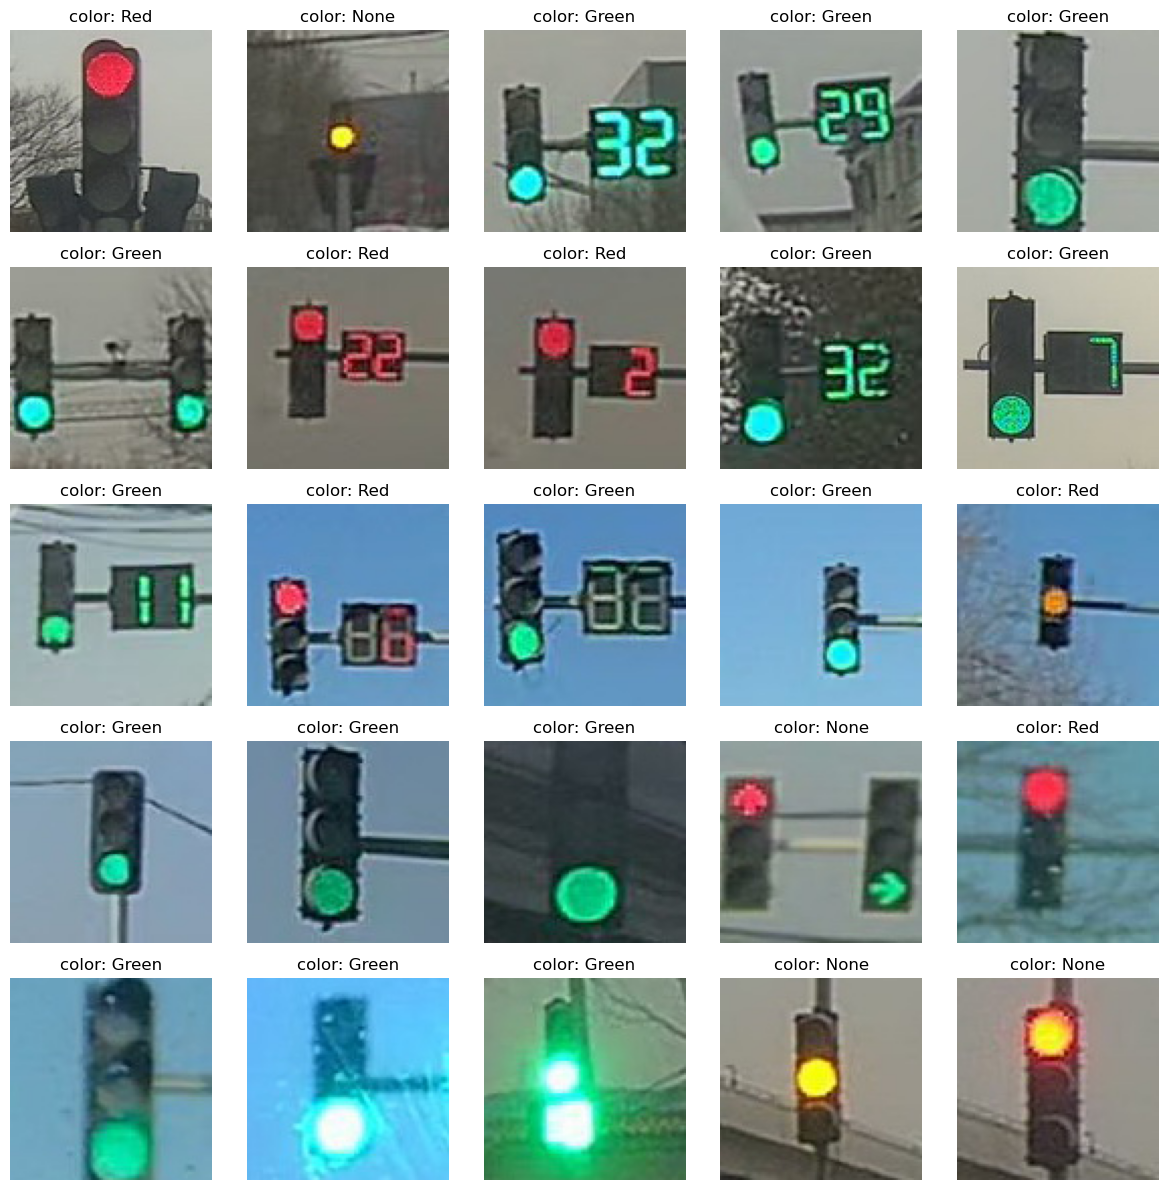

In [20]:
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

for i, image_name in enumerate(image_names[:25]):
    img = cv2.imread(IMG_ROOT + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    color = classify_by_color(image_name)
    ax[i].set_title(f"color: {color}")
    ax[i].axis('off')
fig.savefig("result_1.png", bbox_inches='tight')
plt.tight_layout()

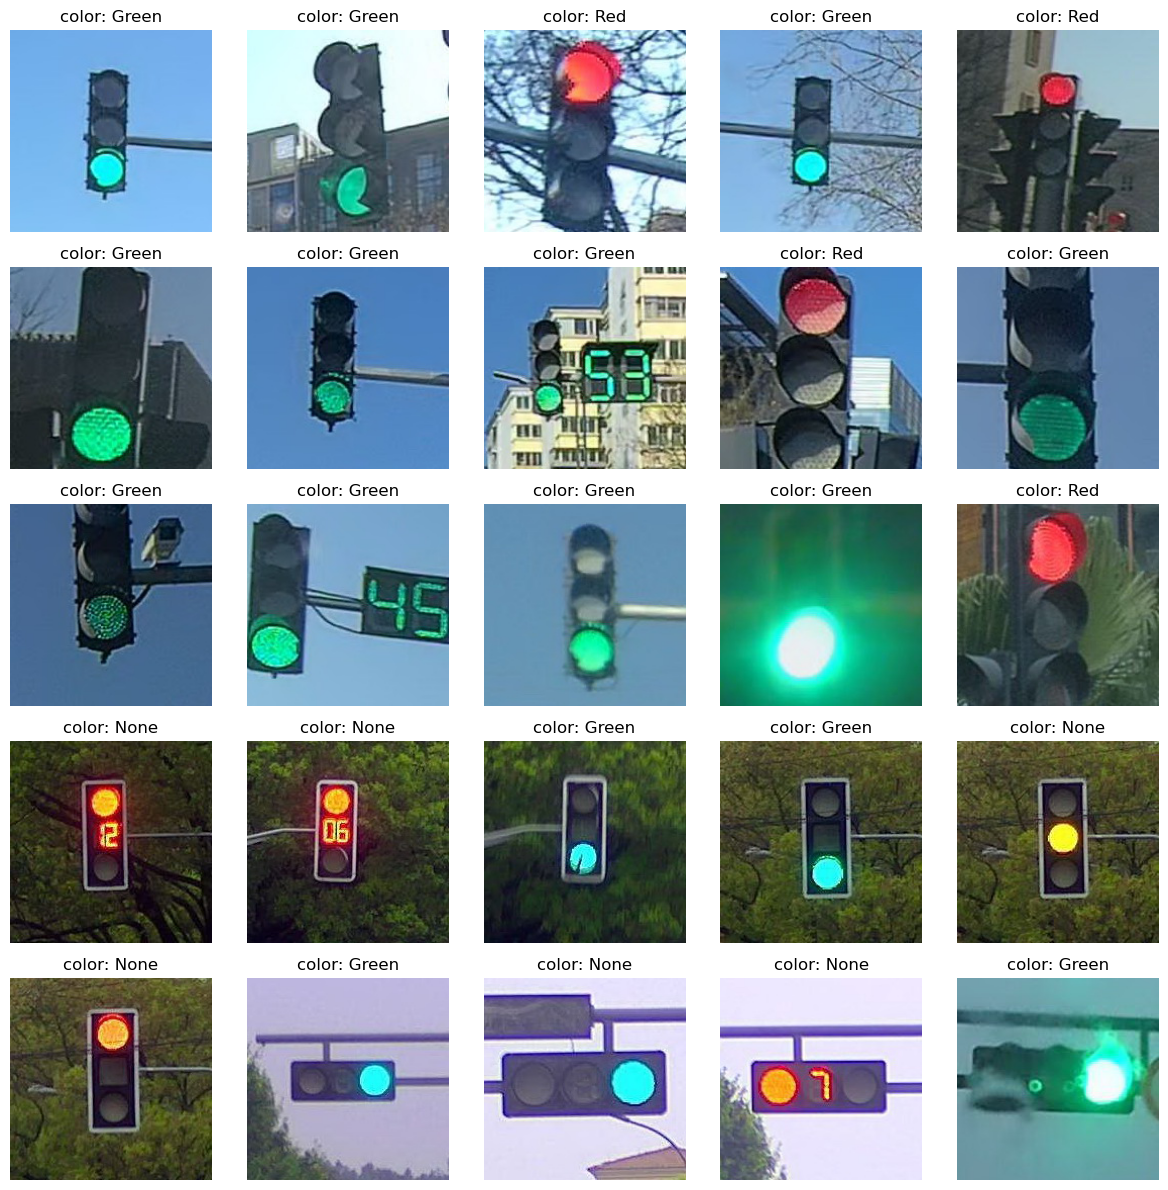

In [21]:
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

for i, image_name in enumerate(image_names[25:]):
    img = cv2.imread(IMG_ROOT + image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    color = classify_by_color(image_name)
    ax[i].set_title(f"color: {color}")
    ax[i].axis('off')
fig.savefig("result2.png", bbox_inches='tight')
plt.tight_layout()

Желтый не классифицируется, поскольку он пересекается с оранжевым оттенком красного сигнала (в свою очередь такой красный не классифицируется из-за пересечения с желтым)